In [1]:
using Pkg; Pkg.activate("..");

using StochasticFrontiers;

  Activating project at `~/Documents/project/StochasticFrontiers.jl`
[ Info: Precompiling StochasticFrontiers [207de5b1-58d8-4e40-9f1b-ffdd2ece041b]


In [2]:
# model specification(Half Normal)

res = sfmodel_fit(
    spec = sfspec(
        data      = "data/WangHo2010_data.csv",
        model     = PFEWH(), 
        type      = Prod(), 
        dist      = Half(σᵤ² = :_cons), 
        σᵥ²       = :_cons, 
        hscale    = (:z1, :z2),
        ivar      = :cnum, 
        depvar    = :y, 
        frontiers = (:x1, :x2, :x3)
    ),
    options = sfopt(warmstart_maxIT  = 100), 
);


*********************************
      Model Specification      
*********************************

    panel fixed effect of Wang and Ho (2010 JE)

    Yᵢₜ = αᵢ + Xᵢₜ*β + ϵᵢₜ
        where ϵᵢₜ = vᵢₜ - uᵢₜ

        further,     
            vᵢₜ ∼ N(0, σᵥ²),
            σᵥ²  = exp(log_σᵥ²)

            uᵢₜ ∼ hscaleᵢₜ * uᵢ
            hscaleᵢₜ = exp(log_hscaleᵢₜ)

            uᵢ ∼ N⁺(0, σᵤ²),
            σᵤ² = exp(log_σᵤ²)

    In the case of type(cost), "- uᵢₜ" above should be changed to "+ uᵢₜ"

*********************************
        Estimation Results 
*********************************

 Converge:                   true
 Log-likelihood Value:       -1363.73164

 Number Of Total Iterations: 111
 Time Consuming:             0.06514
 Numberf Of Observations:    1220

┌──────────────────┬───────┬─────────┬───────────┬─────────┬──────────┬───────────┬───────────┐
│                  │  Var. │   Coef. │ Std. Err. │       z │ Pr(>|z|) │ Lower 95% │ Upper 95% │
├──────────────────┼───────

In [3]:
sfcheck_converge(res)

 * Status: success

 * Candidate solution
    Final objective value:     1.363732e+03

 * Found with
    Algorithm:     Newton's Method

 * Convergence measures
    |x - x'|               = 3.71e-05 ≰ 0.0e+00
    |x - x'|/|x'|          = 4.35e-06 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.83e-10 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 2.08e-13 ≰ 0.0e+00
    |g(x)|                 = 7.32e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    11
    f(x) calls:    207
    ∇f(x) calls:   49
    ∇²f(x) calls:  11



In [4]:
options = sfoptions(res)
Dict{Symbol, Any}(zip(keys(options), values(options)))

Dict{Symbol, Any} with 8 entries:
  :show_trace       => false
  :verbose          => true
  :table_format     => :text
  :warmstart_solver => NelderMead{AffineSimplexer, AdaptiveParameters}(AffineSi…
  :tolerance        => 1.0e-8
  :warmstart_maxIT  => 100
  :main_maxIT       => 2000
  :main_solver      => Newton{InitialStatic{Float64}, HagerZhang{Float64, RefVa…

In [5]:
# initial and the MLE
[sfmodel(res).paramnames  sfstartpt(res) sfmaximizer(res)]

7×4 Matrix{Any}:
 :demean_frontiers  :x1     -2.31328    0.654957
 Symbol("")         :x2      0.565165   0.150022
 Symbol("")         :x3      0.342922   0.339711
 :log_σᵤ²           :_cons   0.1        8.52353
 :log_σᵥ²           :_cons   0.1       -0.158113
 :log_hscale        :z1      0.1        0.0178591
 Symbol("")         :z2      0.1       -0.651941

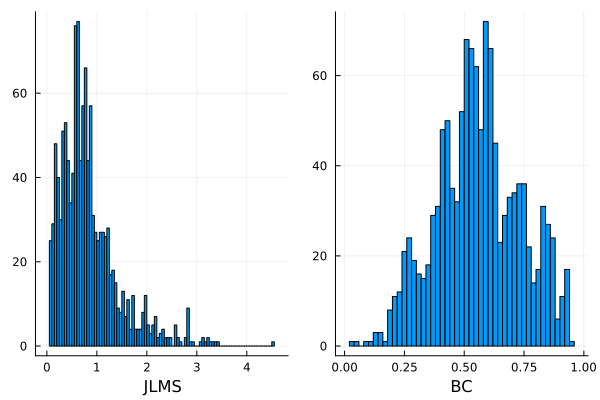

In [6]:
plot_inefficieny(res)

In [7]:
marginal, marginal_mean = sfmarginal(res)
Dict{Symbol, Float64}(zip(keys(marginal_mean), values(marginal_mean)))

Dict{Symbol, Float64} with 2 entries:
  :marg_z1 => 0.0152305
  :marg_z2 => -0.555985

In [2]:
# model specification(Truncated Normal)

res = sfmodel_fit(
    spec = sfspec(
        data      = "data/WH2010T.csv",
        model     = PFEWH(), 
        type      = Prod(), 
        dist      = Trun(μ = :_cons, σᵤ² = :_cons), 
        σᵥ²       = :_cons, 
        hscale    = :zit,
        ivar      = :id, 
        depvar    = :yit, 
        frontiers = (:xit,)
    ),
    options = sfopt(warmstart_maxIT  = 200)
);


*********************************
      Model Specification      
*********************************

    panel fixed effect of Wang and Ho (2010 JE)

    Yᵢₜ = αᵢ + Xᵢₜ*β + ϵᵢₜ
        where ϵᵢₜ = vᵢₜ - uᵢₜ

        further,     
            vᵢₜ ∼ N(0, σᵥ²),
            σᵥ²  = exp(log_σᵥ²)

            uᵢₜ ∼ hscaleᵢₜ * uᵢ
            hscaleᵢₜ = exp(log_hscaleᵢₜ)

            uᵢ ∼ N⁺(0, σᵤ²),
            σᵤ² = exp(log_σᵤ²)

    In the case of type(cost), "- uᵢₜ" above should be changed to "+ uᵢₜ"

*********************************
        Estimation Results 
*********************************

 Converge:                   true
 Log-likelihood Value:       -364.19278

 Number Of Total Iterations: 203
 Time Consuming:             0.00936
 Numberf Of Observations:    1000

┌──────────────────┬───────┬─────────┬───────────┬──────────┬──────────┬───────────┬───────────┐
│                  │  Var. │   Coef. │ Std. Err. │        z │ Pr(>|z|) │ Lower 95% │ Upper 95% │
├──────────────────┼──────

In [9]:
sfcheck_converge(res)

 * Status: success

 * Candidate solution
    Final objective value:     3.641928e+02

 * Found with
    Algorithm:     Newton's Method

 * Convergence measures
    |x - x'|               = 2.83e-10 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.25e-10 ≰ 0.0e+00
    |f(x) - f(x')|         = 5.68e-14 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.56e-16 ≰ 0.0e+00
    |g(x)|                 = 1.20e-12 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    3
    f(x) calls:    344
    ∇f(x) calls:   9
    ∇²f(x) calls:  3



In [10]:
[sfmodel(res).paramnames  sfstartpt(res) sfmaximizer(res)]

5×4 Matrix{Any}:
 :demean_frontiers  :xit    0.524884   0.497277
 :μ                 :_cons  0.1        0.795456
 :log_σᵤ²           :_cons  0.1       -0.757236
 :log_σᵥ²           :_cons  0.1       -2.25417
 :log_hscale        :zit    0.1        0.469119

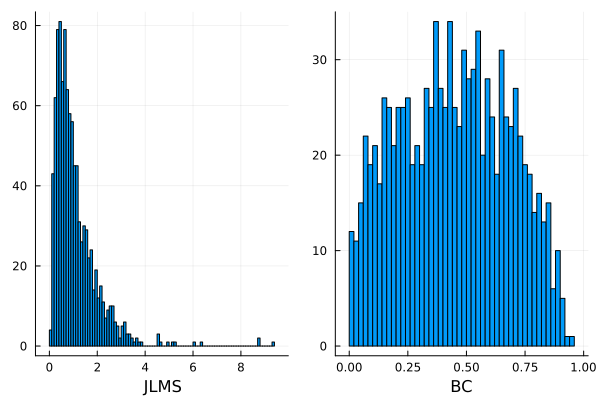

In [11]:
plot_inefficieny(res)

In [12]:
marginal, marginal_mean = sfmarginal(res)
Dict{Symbol, Float64}(zip(keys(marginal_mean), values(marginal_mean)))

Dict{Symbol, Float64} with 1 entry:
  :marg_zit => 0.505907

In [6]:
std_ci, bsdata = sfmarginal_bootstrap(res, R = 400, seed = 123);

Resampling: 100%|██████████████████████████████| Time: 0:00:30



Bias-Corrected 95% Confidence Interval:

┌─────┬──────────────────────────────┬───────────┬───────────┬───────────┐
│     │ mean marginal effect of E(u) │ Std. Err. │ Lower 95% │ Upper 95% │
├─────┼──────────────────────────────┼───────────┼───────────┼───────────┤
│ zit │                      0.50591 │   0.03940 │   0.44295 │   0.60055 │
└─────┴──────────────────────────────┴───────────┴───────────┴───────────┘

